In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split

In [66]:
data = pd.read_csv('../input_data/GoogleStocks.csv', thousands=',')
data = data.iloc[::-1].reset_index(drop=True)

In [67]:
print data.head()
data = data.drop(['close','open','date'],axis=1)

         date   close     volume    open    high     low
0  2016/03/28  733.53  1300817.0  736.79  738.99  732.50
1  2016/03/29  744.77  1902254.0  734.59  747.25  728.76
2  2016/03/30  750.53  1782278.0  750.10  757.88  748.74
3  2016/03/31  744.95  1718638.0  749.25  750.85  740.94
4  2016/04/01  749.91  1576240.0  738.60  750.34  737.00


In [68]:
print data.head()

      volume    high     low
0  1300817.0  738.99  732.50
1  1902254.0  747.25  728.76
2  1782278.0  757.88  748.74
3  1718638.0  750.85  740.94
4  1576240.0  750.34  737.00


In [69]:
data['avg'] = (data.high + data.low)/2.0

In [70]:
data = data.drop(['high','low'],axis=1)
data = (data - data.mean())/data.std()


In [71]:
data.head()

,volume,avg
0,-0.423720,-1.387194
1,0.454424,-1.373008
2,0.279250,-1.276937
3,0.186330,-1.323481
4,-0.021581,-1.337448


In [72]:
def load_data(stock):
    print "stock ",stock.shape
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    print data.shape
#     sequence_length = seq_len + 1
#     result = []
#     for index in range(len(data) - sequence_length):
#         print index, data[index: index + sequence_length].shape
#         result.append(data[index: index + sequence_length])
    
#     result = np.array(result)
#     print "result ",result.shape
    row = round(0.9 * data.shape[0])
    train = data[:int(row), :]
    print "train ",train.shape
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    print "x train ",x_train.shape
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]
    print "x train ",x_train.shape
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    print "x train ",x_train.shape
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [73]:
# time_step = 5
# X_train, Y_train, X_test, Y_test = load_data(data[::-1],time_step)


In [74]:
# print X_train.shape

In [75]:
# model = build_model3(30,[2,time_step,1])

In [76]:
# model.fit(X_train, 
#           Y_train, 
#           batch_size=512, 
#           epochs=500, 
#           validation_split=0.1, 
#           verbose=0)

In [77]:
# trainScore = model.evaluate(X_train, Y_train, verbose=0)
# print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

# testScore = model.evaluate(X_test, Y_test, verbose=0)

# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))


In [90]:
import matplotlib.pyplot as plt2

def plot(model,X_test,Y_test):
    samples, _ = model.sample(len(X_test))

    volume = samples[:,0]
    avg = samples[:,1]

    plt2.figure()
    plt2.plot(np.arange(len(X_test)),avg,label='predicted avg')
    plt2.plot(np.arange(len(X_test)),X_test,label='actual avg')
    plt2.show()

In [94]:

def hmm(hs,ts):
    
#     X_train, Y_train, X_test, Y_test = load_data(data[::-1])
    X = data.volume
    Y = data.avg
    row = round(0.9 * X.shape[0])

    X_train = X[:int(row)]
    X_test = X[int(row):]
    
    Y_train = Y[:int(row)]
    Y_test = Y[int(row):]
#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
#     print type(X_train)
    hmm = GaussianHMM(n_components=hs,covariance_type="diag", n_iter=ts)
    train = np.column_stack([X_train,Y_train])
    hmm.fit(train)
    
    
#     samples, _ = hmm.sample(len(X_test))
#     avg = samples[:,1]
    
#     plt2.figure()
#     plt2.plot(np.arange(len(avg)),avg,label='predicted avg')
#     plt2.plot(np.arange(len(Y_test)),Y_test,label='actual avg')
#     logprob, de = hmm.decode(train)
    
    
    plot(hmm,X_test,Y_test)

In [95]:
# hmm(4,20)

for  4  hidden states  20  time-steps


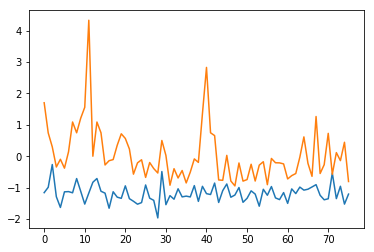

for  4  hidden states  50  time-steps


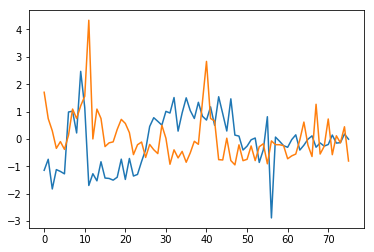

for  4  hidden states  75  time-steps


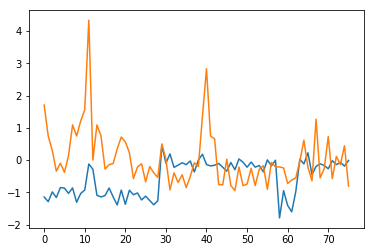

for  8  hidden states  20  time-steps


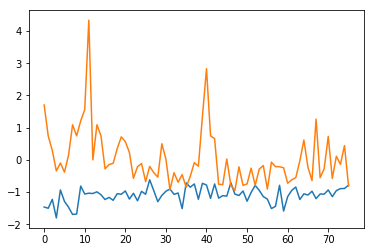

for  8  hidden states  50  time-steps


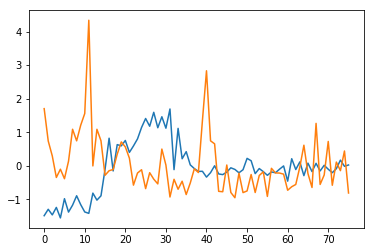

for  8  hidden states  75  time-steps


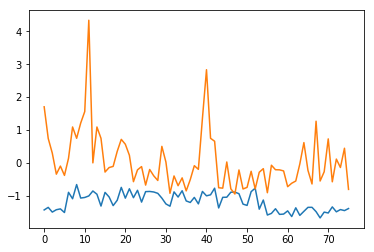

for  12  hidden states  20  time-steps


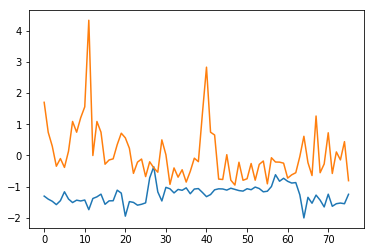

for  12  hidden states  50  time-steps


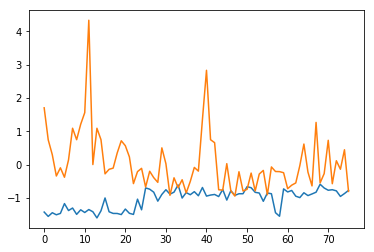

for  12  hidden states  75  time-steps


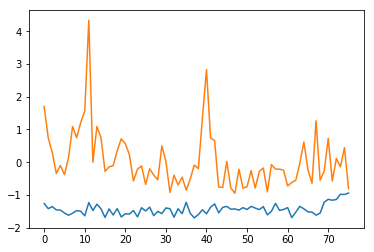

In [96]:
hs = [4,8,12]
nots = [20,50,75]

for c in hs:
    for ts in nots:
        print "for ",c," hidden states ",ts," time-steps"
        hmm(c,ts)